# **DEPENDENCIES**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

# **DATA**

### Sample images from ImageNet

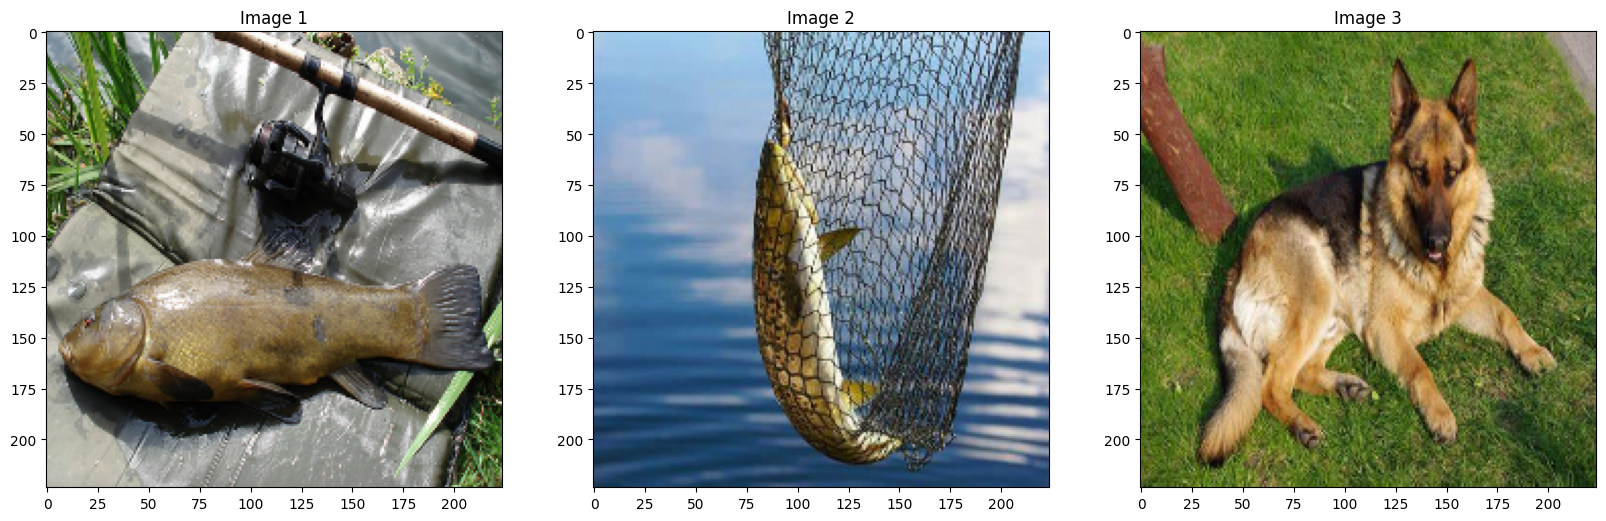

In [5]:
im1 = cv2.imread("C:\workspace-a\EE511-CV-IIT-Mandi\A3\Q4\ILSVRC2012_val_00009111.jpeg")
im2 = cv2.imread("C:\workspace-a\EE511-CV-IIT-Mandi\A3\Q4\OIP (4).jpeg")
im3 = cv2.imread("C:\workspace-a\EE511-CV-IIT-Mandi\A3\Q4\OIP (5).jpeg")

im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

im1 = cv2.resize(im1, (224, 224))
im2 = cv2.resize(im2, (224, 224))
im3 = cv2.resize(im3, (224, 224))

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(im1)
plt.title("Image 1")
plt.subplot(132)
plt.imshow(im2)
plt.title("Image 2")
plt.subplot(133)
plt.imshow(im3)
plt.title("Image 3")
plt.show()

# **KMeans**

In [6]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None

    def fit(self, X):
        # randomly initialize centroids
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[idx, :]
        # assign labels
        self.labels = self.assign_labels(X)
        # update centroids
        for i in range(self.max_iter):
            self.centroids = self.update_centroids(X)
            new_labels = self.assign_labels(X)
            # check if converged
            if np.all(self.labels == new_labels):
                break
            self.labels = new_labels

    def assign_labels(self, X):
        # calculate distance between each point and each centroid
        dist = np.sqrt(((X - self.centroids[:, np.newaxis]) ** 2).sum(axis=2))
        # assign labels
        return np.argmin(dist, axis=0)

    def update_centroids(self, X):
        # update centroids
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i, :] = np.mean(X[self.labels == i, :], axis=0)
        return centroids
    
    def predict(self, X):
        return self.assign_labels(X)
    
    def fit_predict(self, X):
        self.fit(X)
        return self.labels

### **Segmentation**

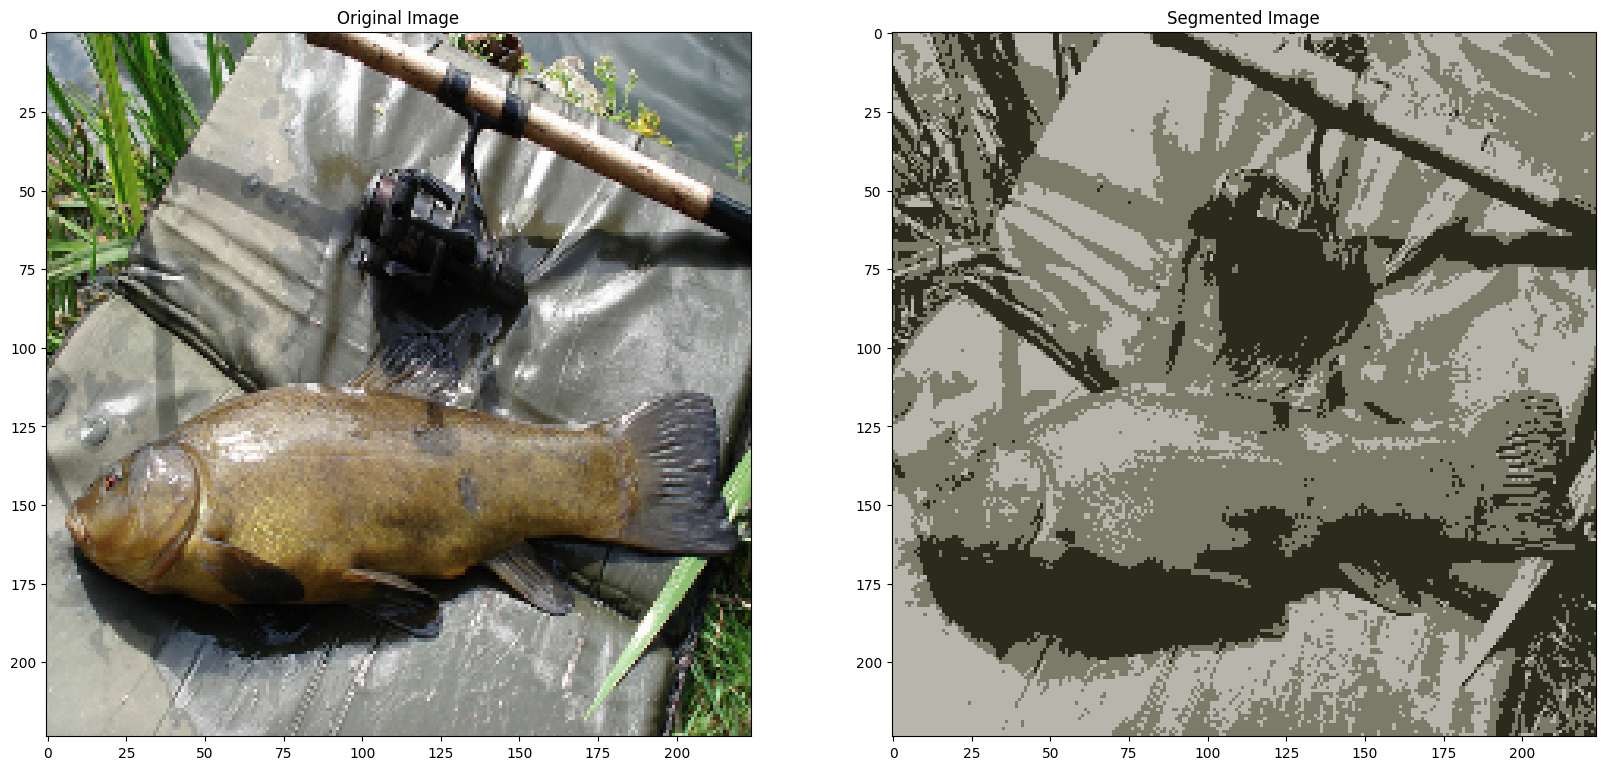

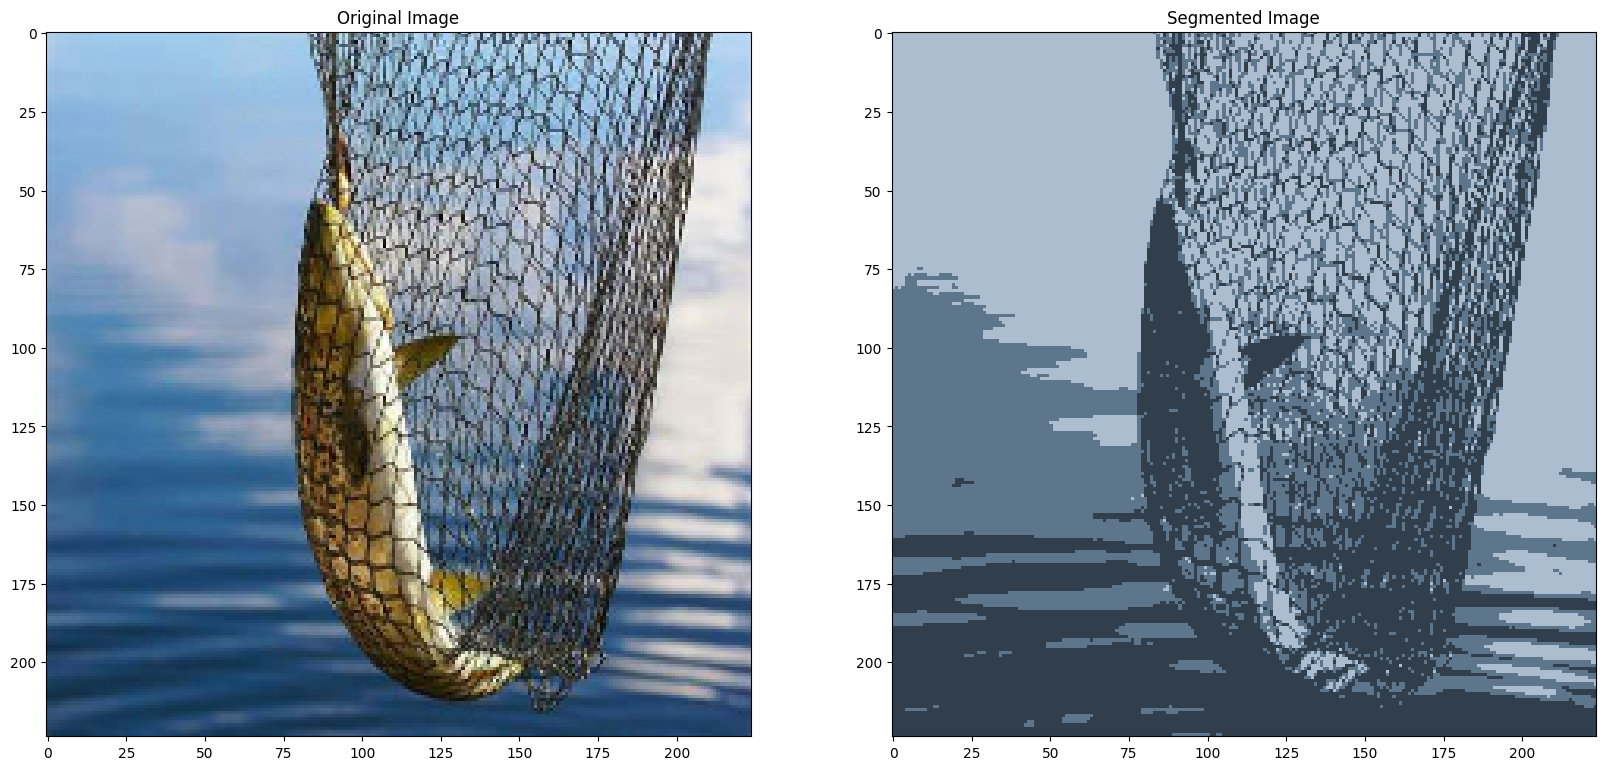

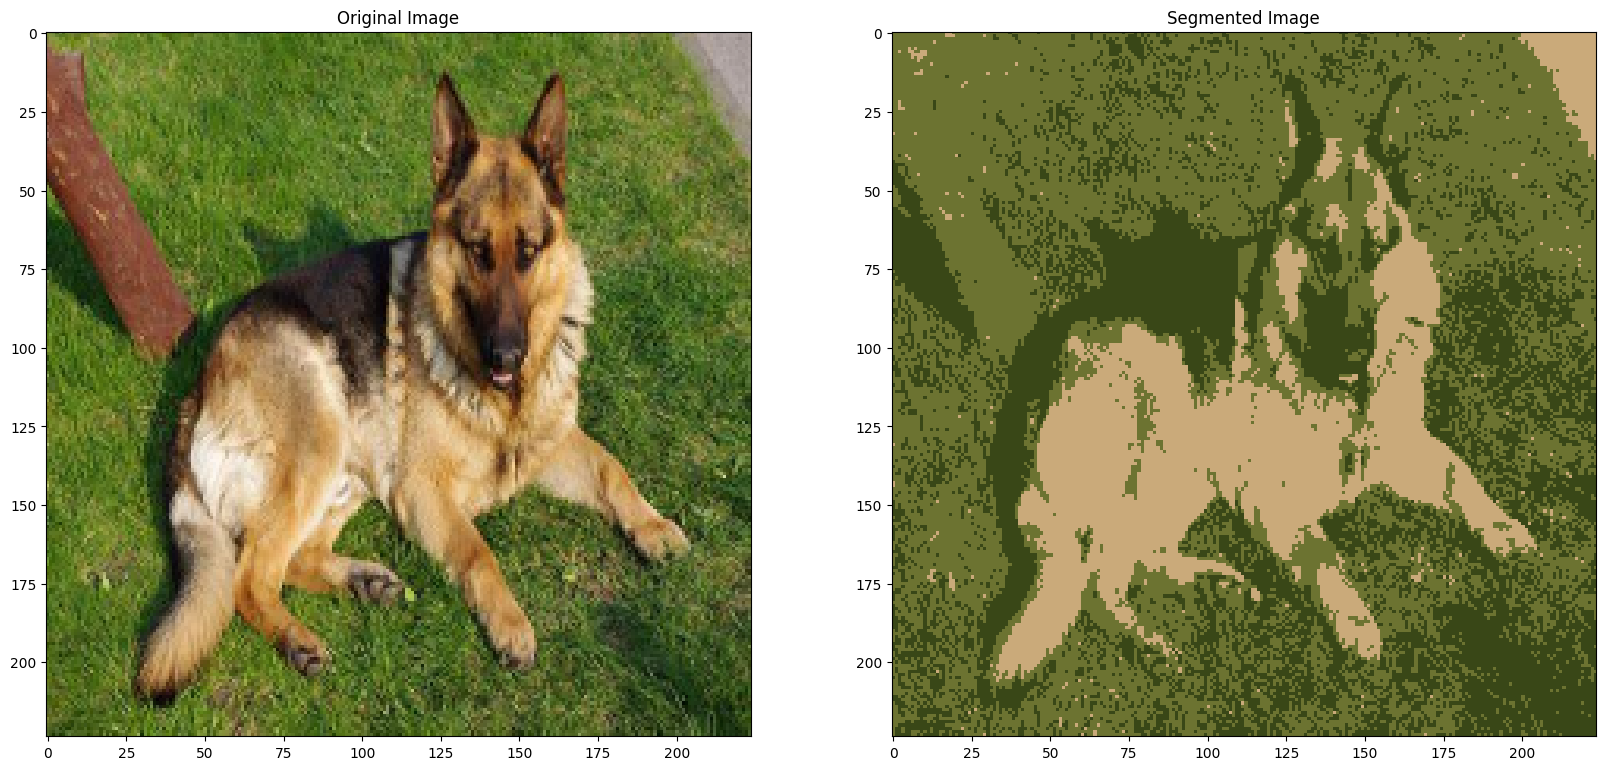

In [16]:
for img in (im1, im2, im3):
    X = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=3, max_iter=100)
    labels = kmeans.fit_predict(X)
    segmented_img = kmeans.centroids[labels].reshape(img.shape)
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.imshow(img)
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(segmented_img.astype(np.uint8))
    plt.title("Segmented Image")
    plt.show()

# **GMM**

In [18]:
class GMM:
    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.means = None
        self.covs = None
        self.priors = None

    def fit(self, X):
        # randomly initialize centroids
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.means = X[idx, :]
        # initialize covariances
        self.covs = np.zeros((self.n_clusters, X.shape[1], X.shape[1]))
        for i in range(self.n_clusters):
            self.covs[i, :, :] = np.cov(X.T)
        # initialize priors
        self.priors = np.ones(self.n_clusters) / self.n_clusters
        # assign labels
        self.labels = self.assign_labels(X)
        # update centroids
        for i in range(self.max_iter):
            self.means, self.covs, self.priors = self.update_params(X)
            new_labels = self.assign_labels(X)
            # check if converged
            if np.all(self.labels == new_labels):
                break
            self.labels = new_labels

    def assign_labels(self, X):
        # calculate distance between each point and each centroid
        dist = np.sqrt(((X - self.means[:, np.newaxis]) ** 2).sum(axis=2))
        # assign labels
        return np.argmin(dist, axis=0)

    def update_params(self, X):
        # update means
        means = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            means[i, :] = np.mean(X[self.labels == i, :], axis=0)
        # update covariances
        covs = np.zeros((self.n_clusters, X.shape[1], X.shape[1]))
        for i in range(self.n_clusters):
            covs[i, :, :] = np.cov(X[self.labels == i, :].T)
        # update priors
        priors = np.zeros(self.n_clusters)
        for i in range(self.n_clusters):
            priors[i] = np.sum(self.labels == i) / len(X)
        return means, covs, priors
    
    def predict(self, X):
        return self.assign_labels(X)
    
    def fit_predict(self, X):
        self.fit(X)
        return self.labels

### **Segmentation**

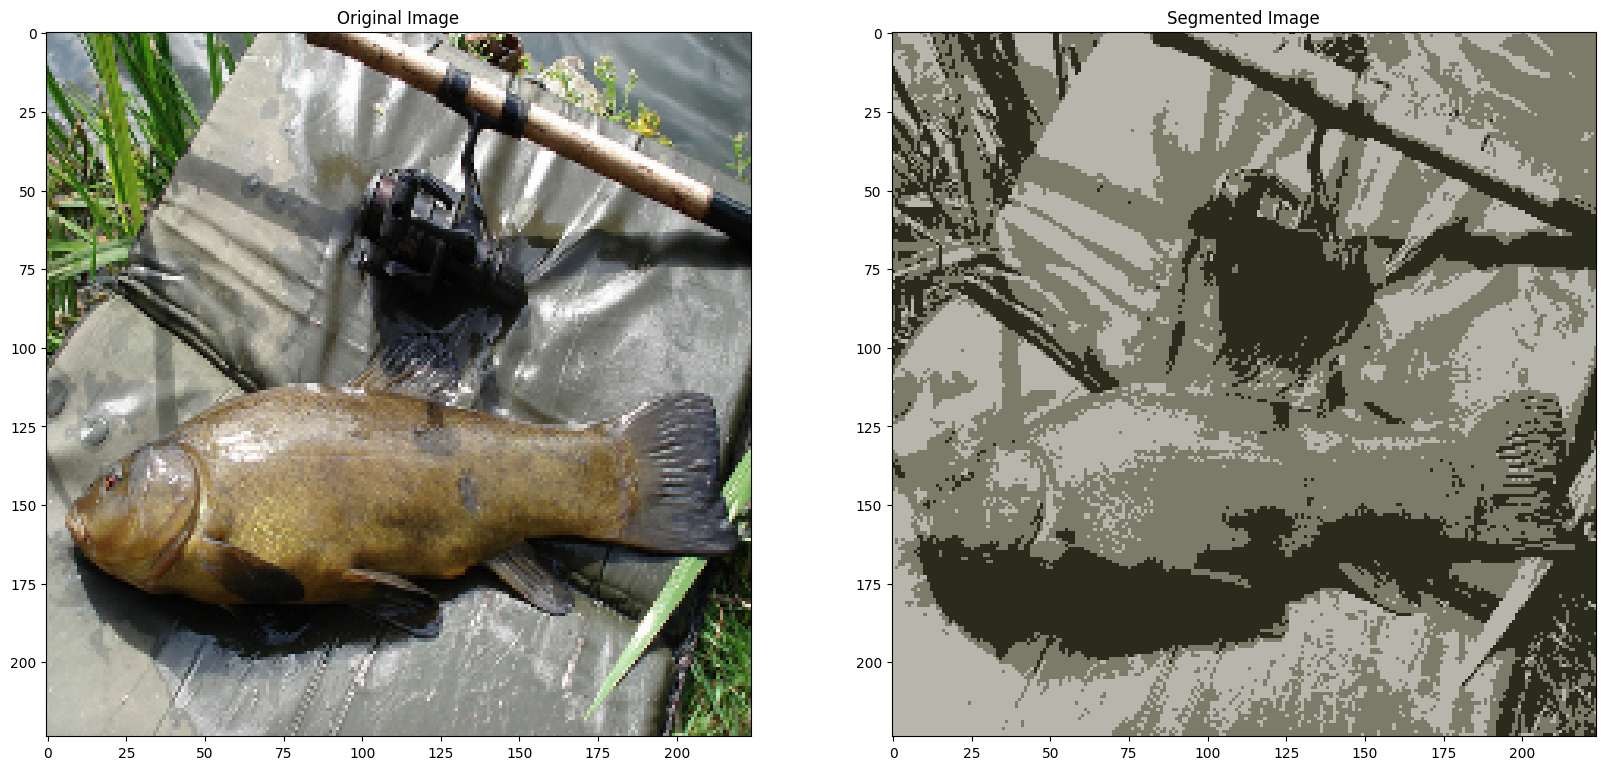

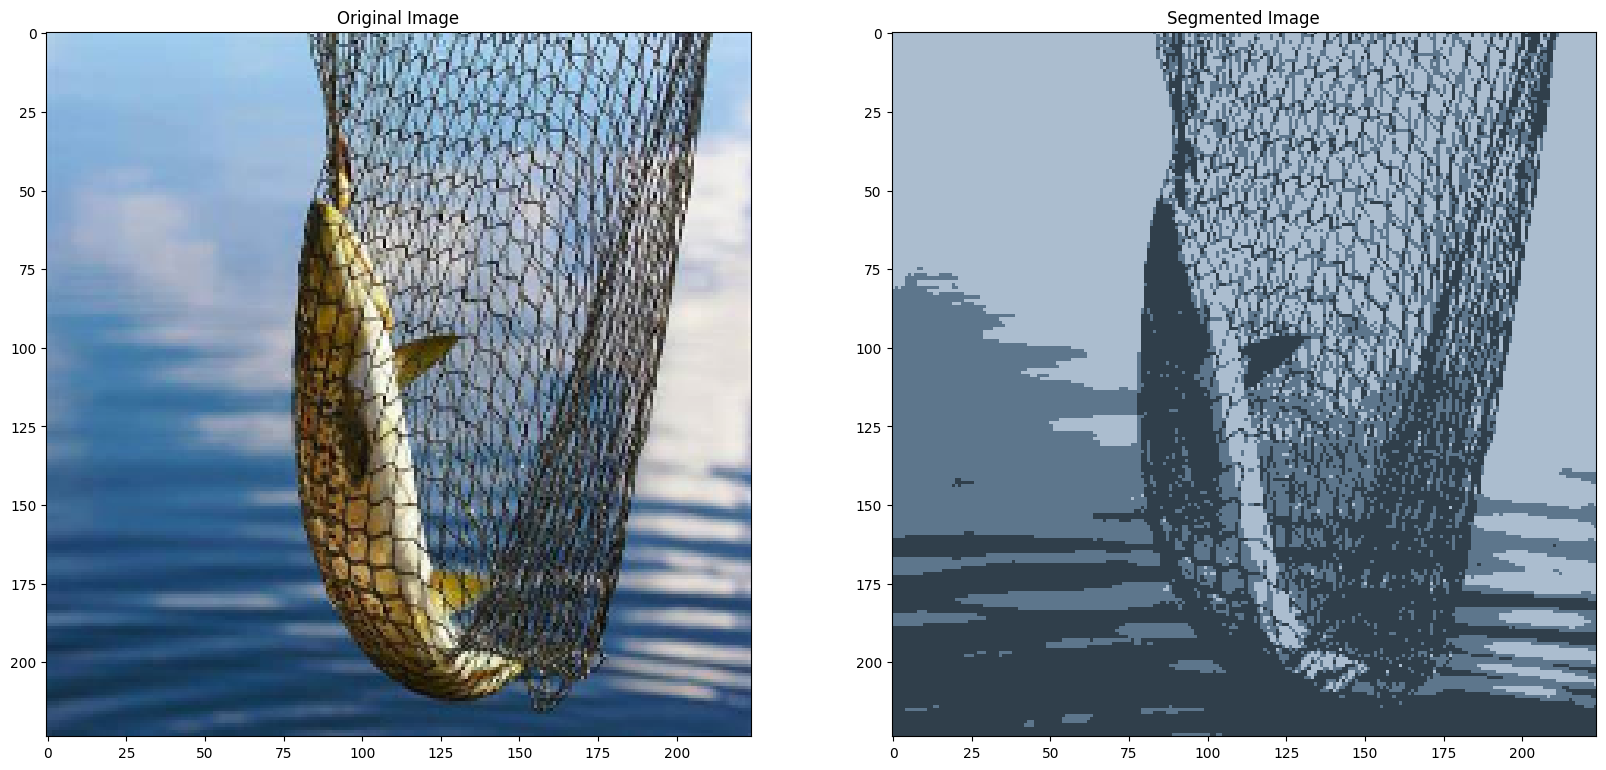

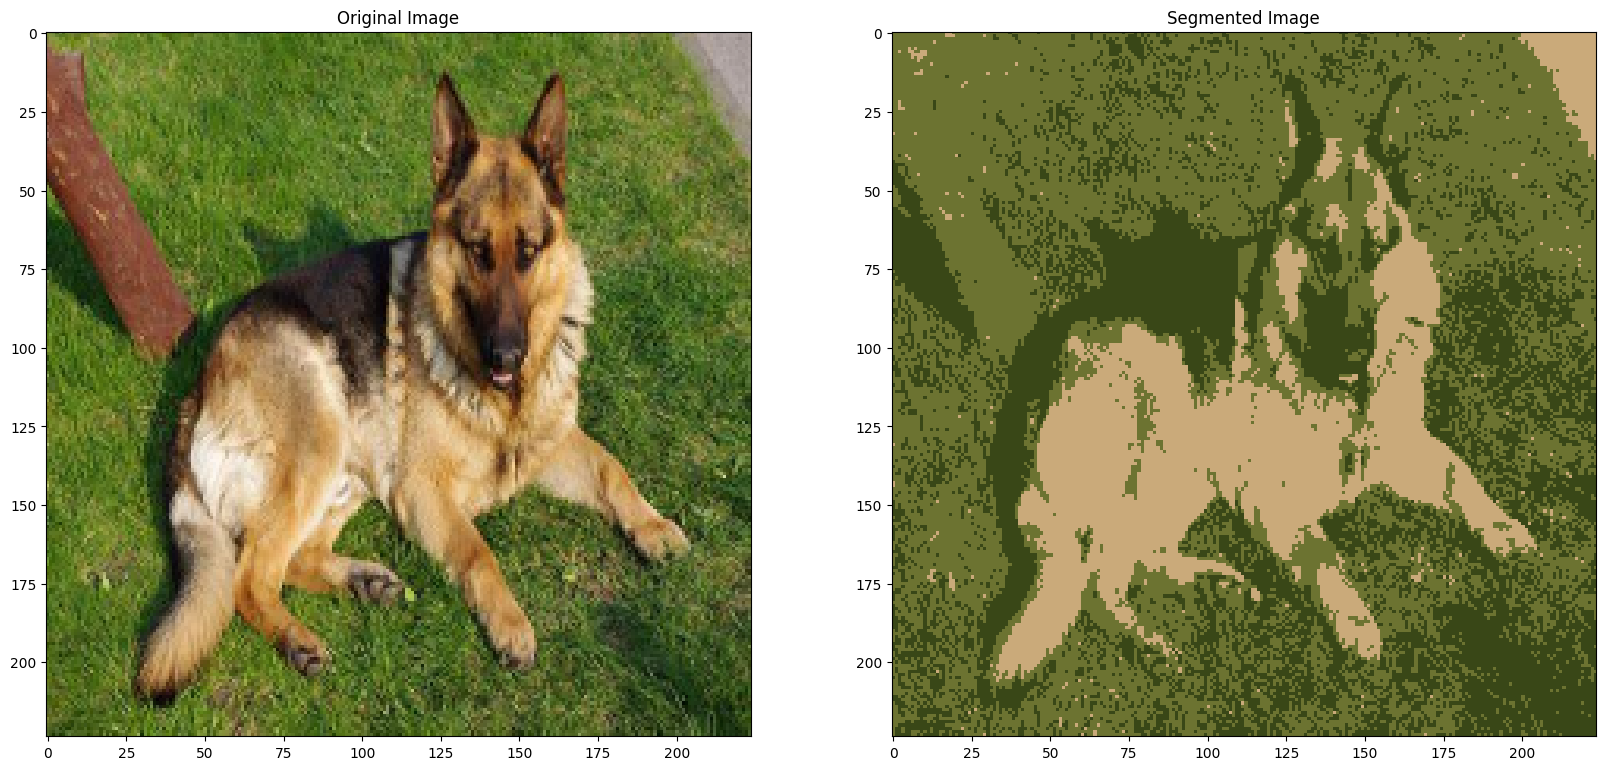

In [19]:
for img in (im1, im2, im3):
    X = img.reshape(-1, 3)
    gmm = GMM(n_clusters=3, max_iter=100)
    labels = gmm.fit_predict(X)
    segmented_img = gmm.means[labels].reshape(img.shape)
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.imshow(img)
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(segmented_img.astype(np.uint8))
    plt.title("Segmented Image")
    plt.show()